<a href="https://colab.research.google.com/github/Rodrigo-Antonio-Silva/DataScienceProject/blob/main/AnaliseMercadoAtacadista.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
col = ['Cidade', 'Estado', 'Segmento', 'Volume_(Cx/mês)', 'Entregas/mês', 'lala', 'lele']

In [3]:
df = pd.read_excel ('/content/drive/MyDrive/Bases_DS/Análise de Dados Vale_Online_10_2020.xlsx', sheet_name=1, header=0, index_col=False)

In [4]:
df.columns = col

In [5]:
df.drop(labels=['lala', 'lele'], axis=1, inplace=True)

In [6]:
df.drop(index=[0, 1, 2, 3, 4], axis=0, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 5 to 195
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cidade           191 non-null    object
 1   Estado           191 non-null    object
 2   Segmento         191 non-null    object
 3   Volume_(Cx/mês)  191 non-null    object
 4   Entregas/mês     191 non-null    object
dtypes: object(5)
memory usage: 9.0+ KB


In [8]:
table = pd.pivot_table (df, index=['Segmento'], columns=['Estado'], values=['Volume_(Cx/mês)'], aggfunc=np.sum, fill_value=0, margins=True)

In [9]:
print(table)

                        Volume_(Cx/mês)                
Estado                               RS      SC     All
Segmento                                               
ATACADOS                          19912   53918   73830
COMIDAS E BEBIDAS                 77317   85496  162813
COMPRAS DE MERCEARIA              37048   67511  104559
DPP/PVA                           26498   11407   37905
SEM SEGMENTO DE MERCADO               0    2409    2409
SUPERMERCADOS                    142392   95288  237680
All                              303167  316029  619196


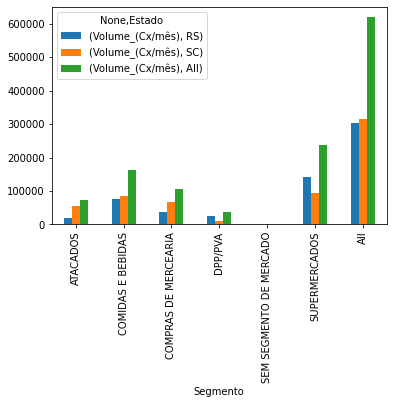

In [10]:
table.plot(kind='bar');

In [11]:
table2 = pd.pivot_table(df, index=['Segmento', 'Cidade'], columns=['Estado'], values=['Volume_(Cx/mês)'], aggfunc=np.sum, fill_value=0, margins=True)

In [12]:
print(table2)

                             Volume_(Cx/mês)                
Estado                                    RS      SC     All
Segmento      Cidade                                        
ATACADOS      ANTONIO CARLOS               0    4654    4654
              BARRA VELHA                  0    6123    6123
              BENEDITO NOVO                0    4481    4481
              BIGUACU                      0    4642    4642
              FLORIANOPOLIS                0     912     912
...                                      ...     ...     ...
SUPERMERCADOS TAQUARA                   4830       0    4830
              TIMBO                        0   10456   10456
              TRAMANDAI                 3257       0    3257
              VIAMAO                   12491       0   12491
All                                   303167  316029  619196

[95 rows x 3 columns]


In [14]:
df['Entregas/mês'] = df['Entregas/mês'].apply(pd.to_numeric)

In [15]:
table3 = df.groupby('Segmento')['Entregas/mês'].mean()

In [16]:
print(table3)

Segmento
ATACADOS                   5.526316
COMIDAS E BEBIDAS          3.836364
COMPRAS DE MERCEARIA       3.909091
DPP/PVA                    5.454545
SEM SEGMENTO DE MERCADO    3.000000
SUPERMERCADOS              4.639344
Name: Entregas/mês, dtype: float64


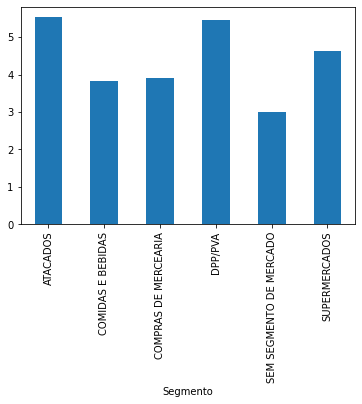

In [17]:
table3.plot(kind='bar');

In [18]:
df['Volume_(Cx/mês)'] = df['Volume_(Cx/mês)'].apply(pd.to_numeric)

In [19]:
vol_porcent = df.groupby('Segmento')['Volume_(Cx/mês)'].sum()

In [20]:
df_vol = pd.DataFrame(vol_porcent)

In [21]:
df_vol.columns

Index(['Volume_(Cx/mês)'], dtype='object')

In [22]:
df_vol['Volume_(Cx/mês)'] = df_vol['Volume_(Cx/mês)'].apply(pd.to_numeric)

In [23]:
df_vol['Volume_(Cx/mês)']

Segmento
ATACADOS                    73830
COMIDAS E BEBIDAS          162813
COMPRAS DE MERCEARIA       104559
DPP/PVA                     37905
SEM SEGMENTO DE MERCADO      2409
SUPERMERCADOS              237680
Name: Volume_(Cx/mês), dtype: int64

In [24]:
tot = df_vol['Volume_(Cx/mês)'].sum()

In [25]:
df_vol['Vol(%)'] = (df_vol['Volume_(Cx/mês)'] / tot) *100

In [26]:
df_vol['Vol(%)']

Segmento
ATACADOS                   11.923527
COMIDAS E BEBIDAS          26.294259
COMPRAS DE MERCEARIA       16.886252
DPP/PVA                     6.121648
SEM SEGMENTO DE MERCADO     0.389053
SUPERMERCADOS              38.385261
Name: Vol(%), dtype: float64

In [27]:
df_vol

,Volume_(Cx/mês),Vol(%)
Segmento,,
ATACADOS,73830,11.923527
COMIDAS E BEBIDAS,162813,26.294259
COMPRAS DE MERCEARIA,104559,16.886252
DPP/PVA,37905,6.121648
SEM SEGMENTO DE MERCADO,2409,0.389053
SUPERMERCADOS,237680,38.385261


In [41]:
df1 = df.groupby('Cidade')['Volume_(Cx/mês)'].sum()

In [49]:

df1 = pd.DataFrame(df1)

In [53]:
df1.idxmax()

Volume_(Cx/mês)    PORTO ALEGRE
dtype: object

In [66]:
df['Entregas/mês'] = df['Entregas/mês'].apply(pd.to_numeric)

In [67]:
df2 = df.groupby('Cidade')['Entregas/mês'].sum()

In [68]:
df2 = pd.DataFrame(df2)

In [77]:
df2[df2['Entregas/mês'] < 4]

,Entregas/mês
Cidade,
ITAJAI,3
NOVA PETROPOLIS,2
ROLANTE,2
SAO FRANCISCO DE PAULA,1
SAPIRANGA,2
